# 数据可视化作业题目

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import pandas as pd

matplotlib.rc("font",family='YouYuan') #设置中文图例

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [4]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


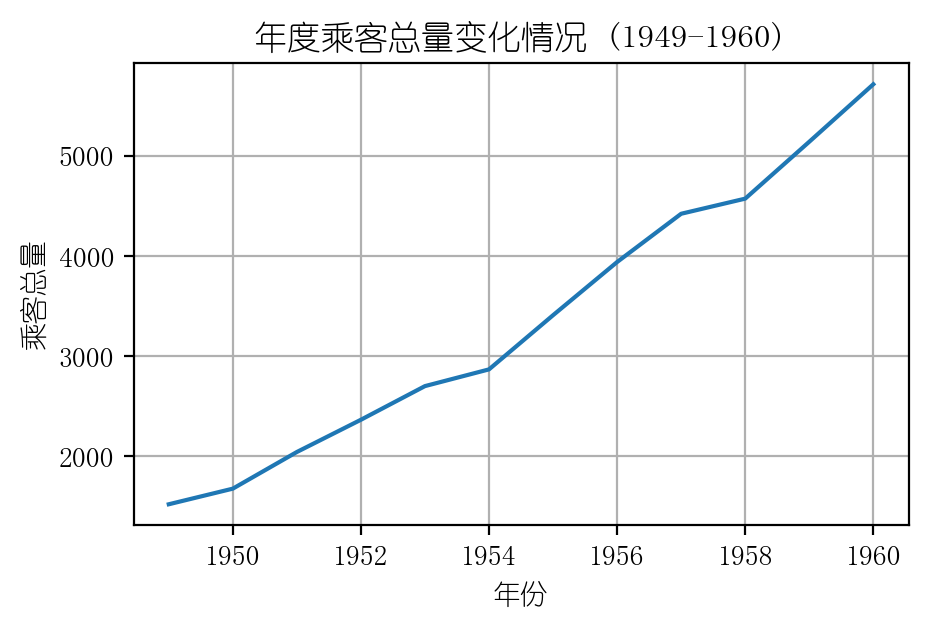

In [6]:
annual_passengers = data.groupby('year')['passengers'].sum().reset_index() # 按照'year'（年份）对数据进行分组，并对每年的乘客数量进行求和。

plt.figure(figsize=(5, 3), dpi=200) #设置图片大小
sns.lineplot(data = annual_passengers, x='year', y='passengers')
plt.title('年度乘客总量变化情况 (1949-1960)')
plt.xlabel('年份')
plt.ylabel('乘客总量')
plt.grid(True) # 显示网格
plt.show()

C:\Users\Logic\AppData\Local\Temp\ipykernel_62304\3855033000.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_passengers = data.groupby('month')['passengers'].mean().reset_index()# 按照'month'（年份）对数据进行分组，并对每月的乘客数量进行求和。


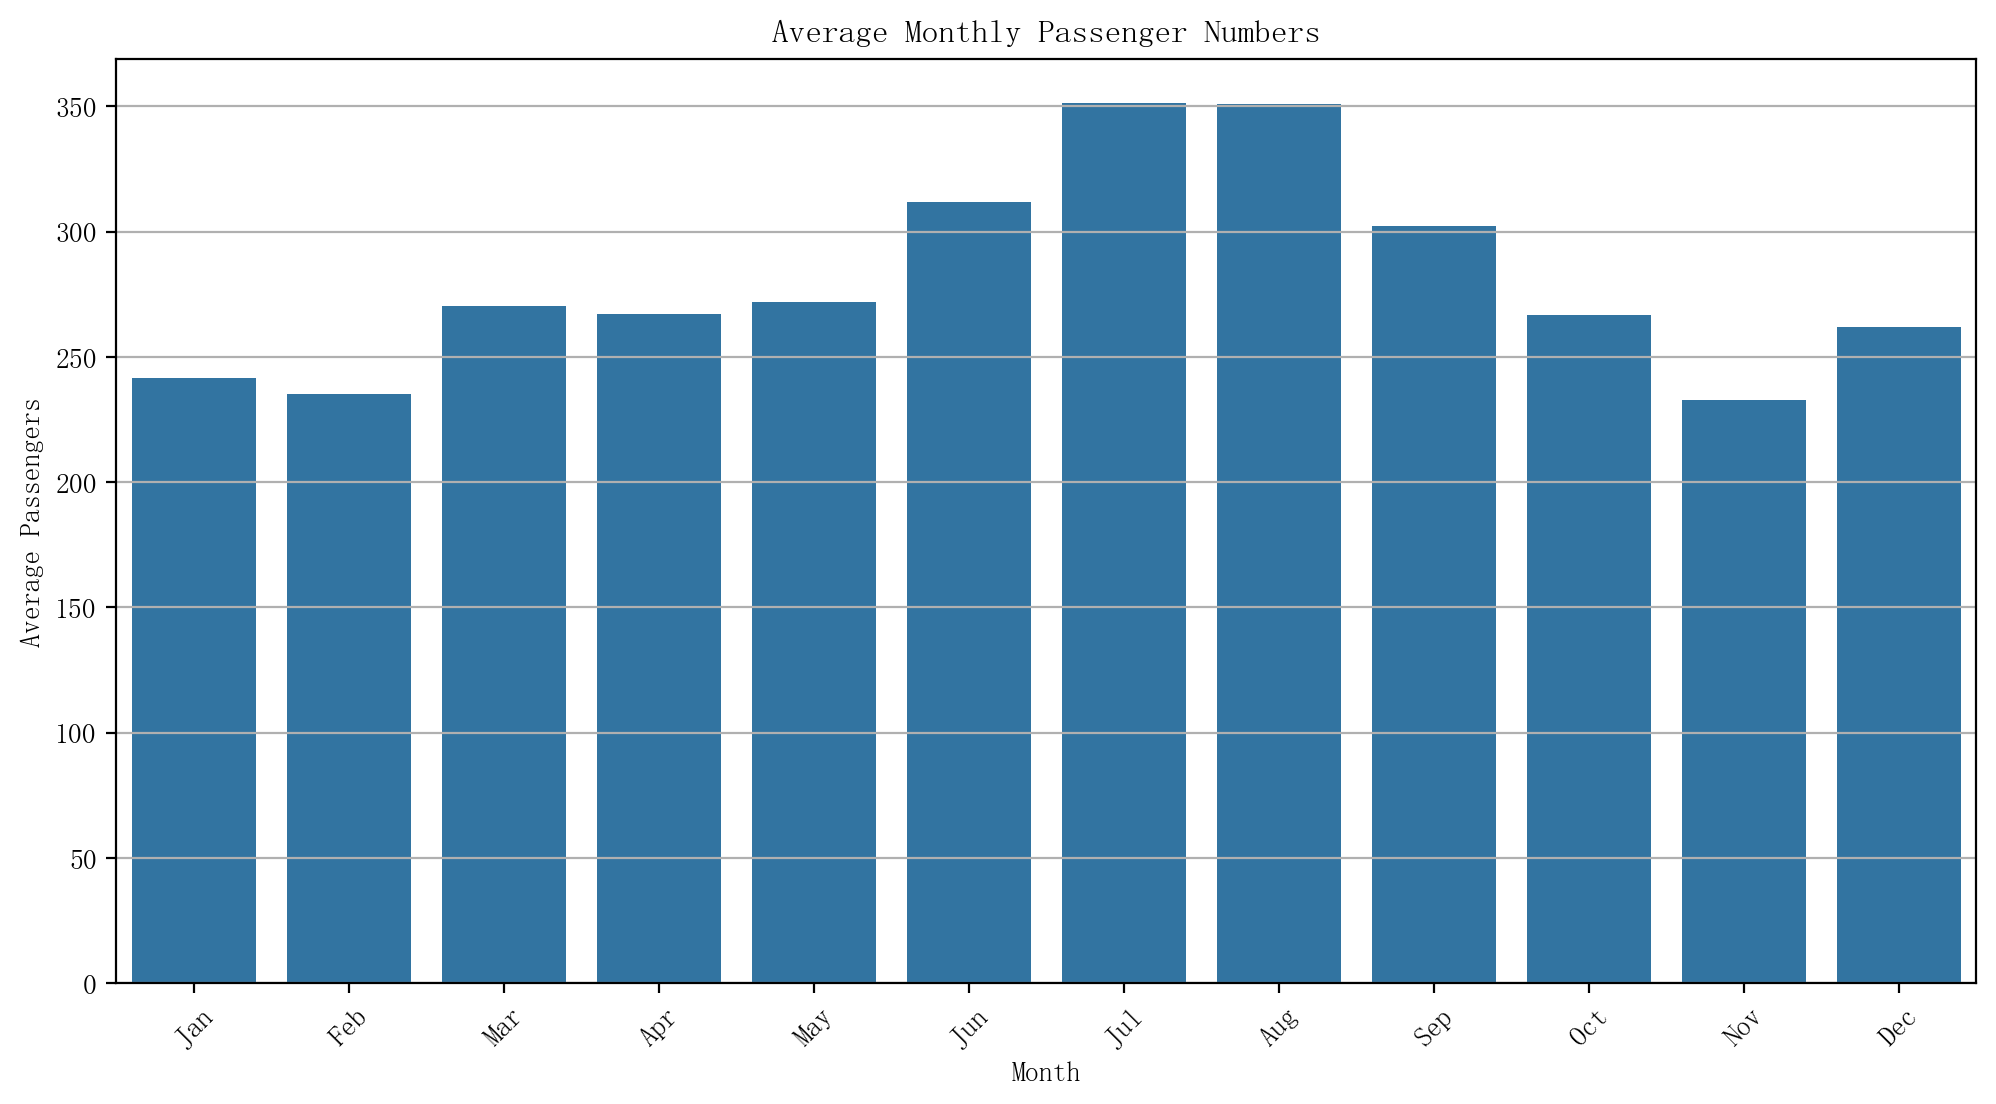

In [11]:
monthly_passengers = data.groupby('month')['passengers'].mean().reset_index()# 按照'month'（年份）对数据进行分组，并对每月的乘客数量进行求和。

plt.figure(figsize=(12, 6), dpi=200)
sns.barplot(data = monthly_passengers, x='month', y='passengers')
plt.title('Average Monthly Passenger Numbers')
plt.xlabel('Month')
plt.ylabel('Average Passengers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [3]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


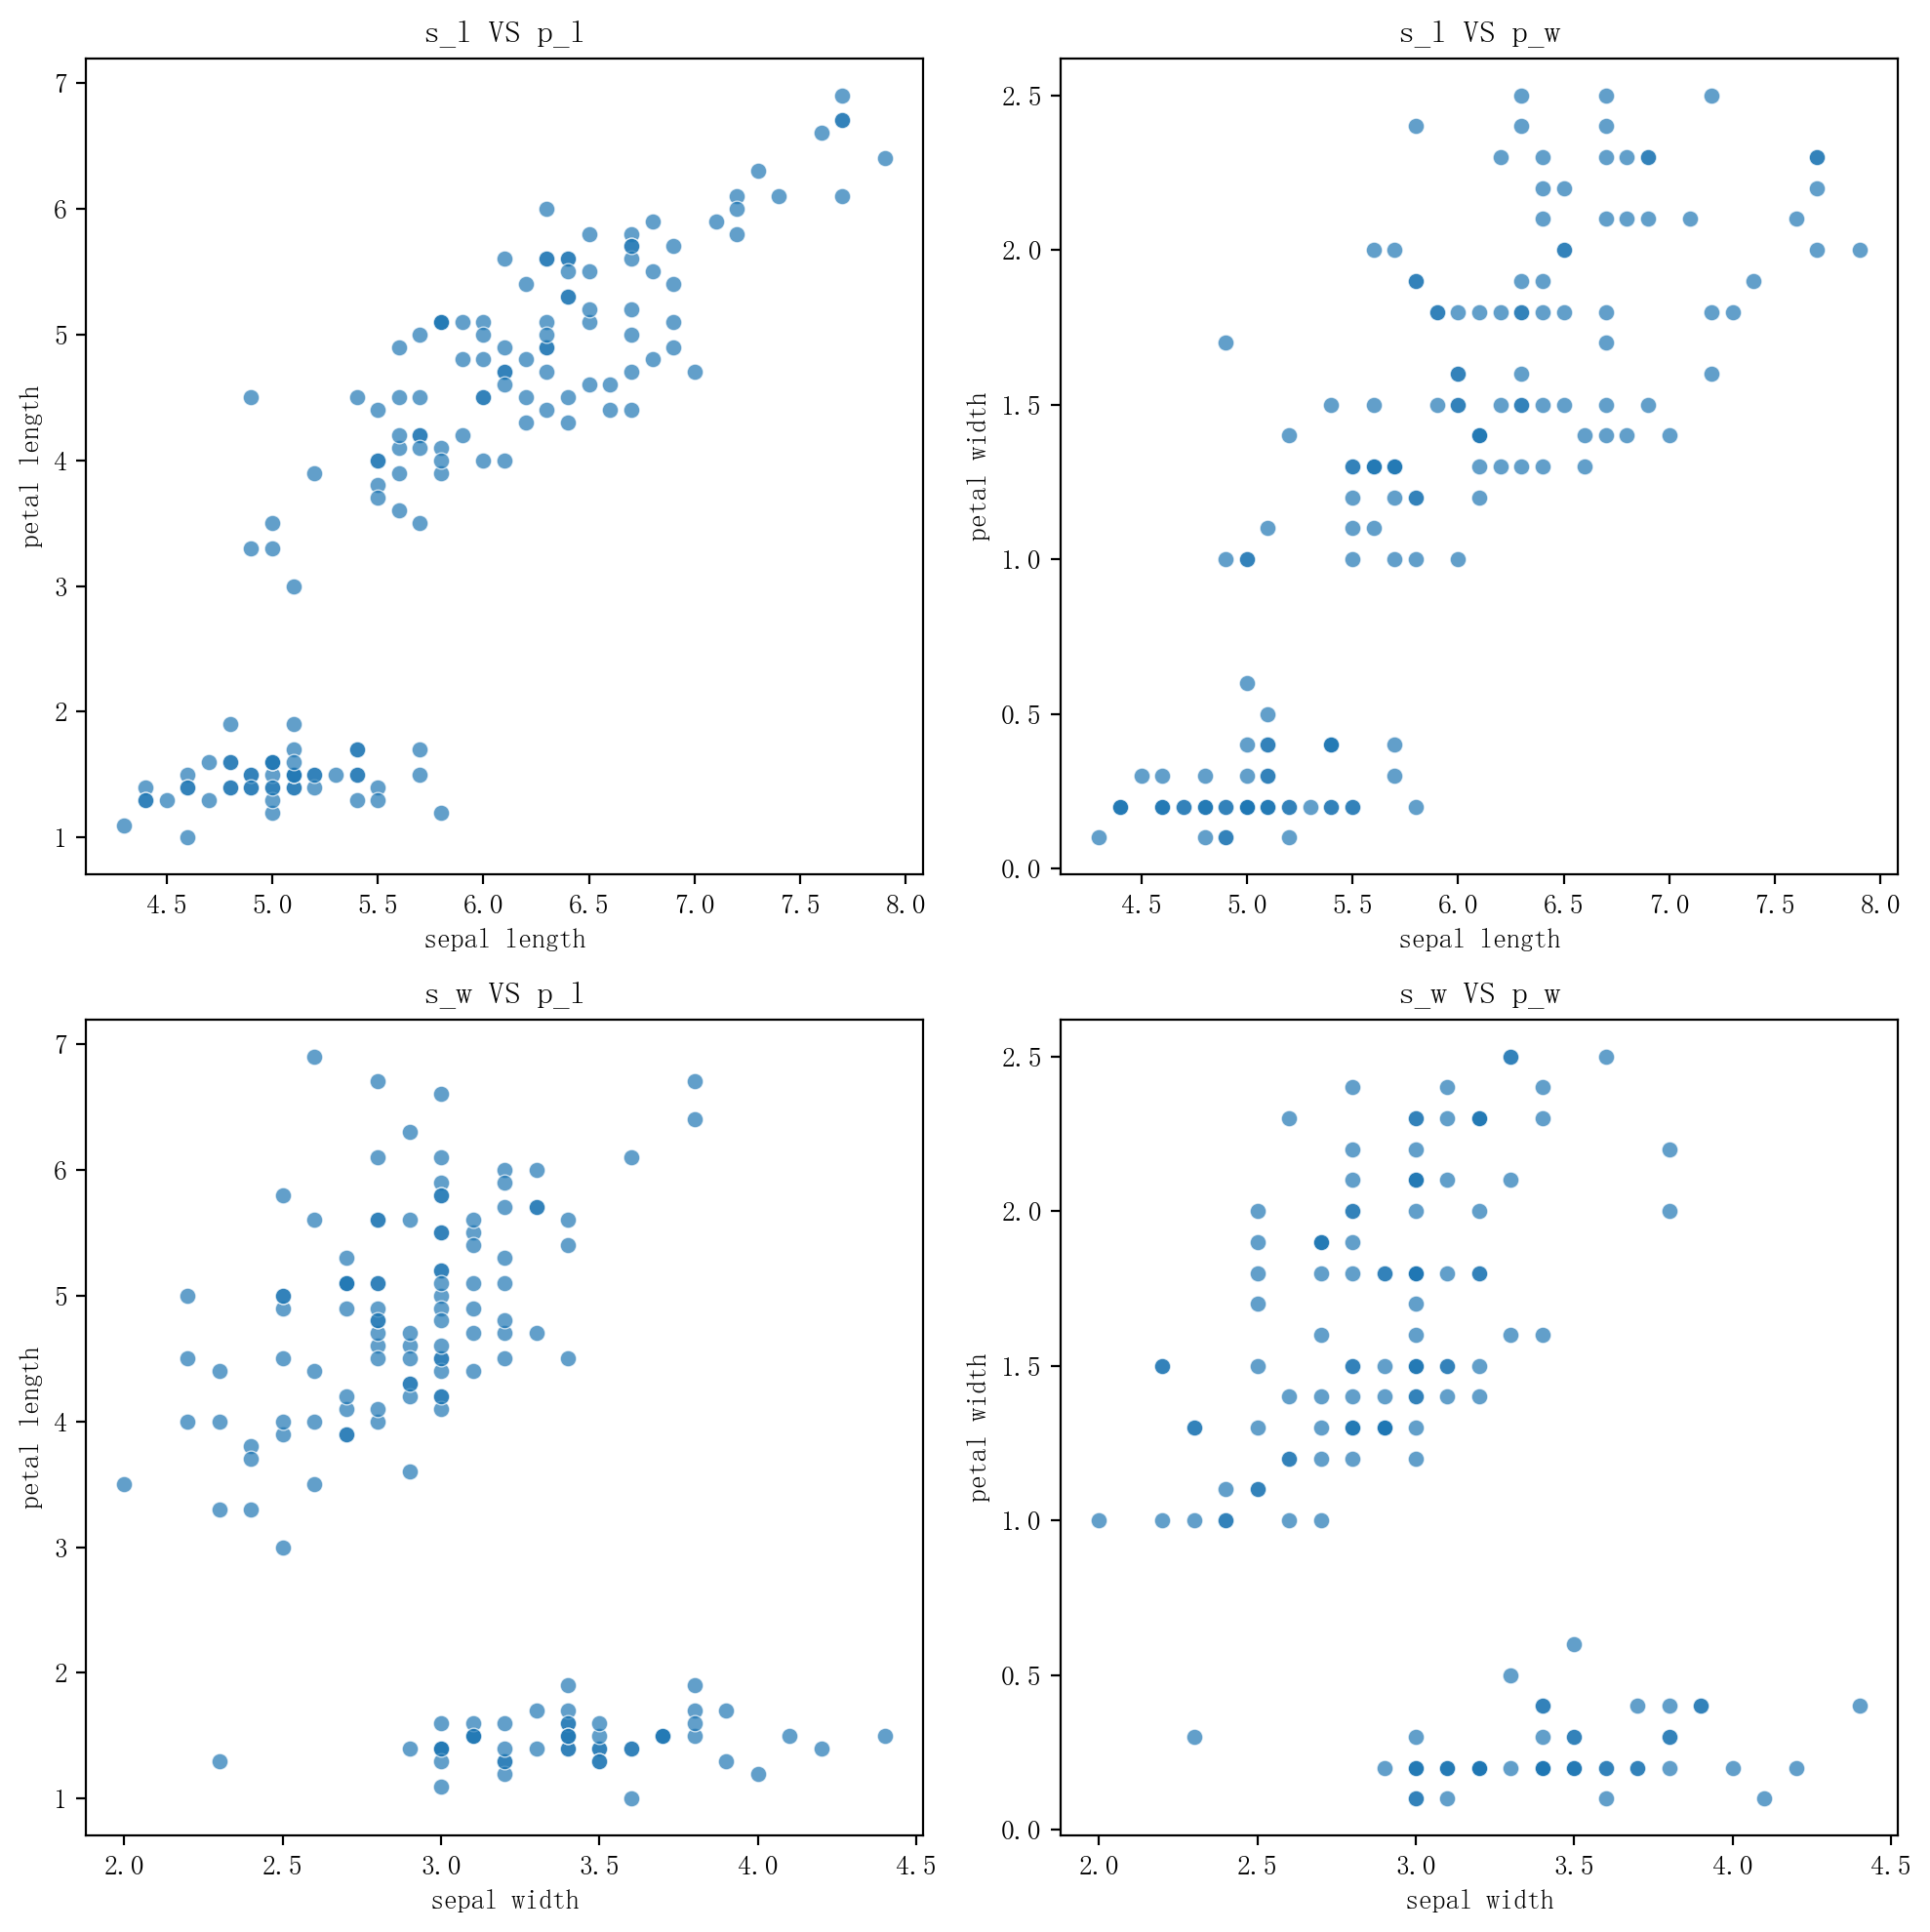

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), dpi=200) #设置2×2子图

# axs[0,0].scatter(data['sepal_length'], data['petal_length'], alpha=0.7)
axes = sns.scatterplot(x= 'sepal_length',y= 'petal_length', ax = axs[0,0], alpha=0.7, data = data)
axes.set_title('s_l VS p_l')
axes.set_xlabel('sepal length')
axes.set_ylabel('petal length')
# axs[0,0].legend()
# axs[0,0].grid(True)

# axs[0,1].scatter(data['sepal_length'], data['petal_width'], alpha=0.7)
axes = sns.scatterplot(x= 'sepal_length',y= 'petal_width', ax = axs[0,1], alpha=0.7, data = data)
axes.set_title('s_l VS p_w')
axes.set_xlabel('sepal length')
axes.set_ylabel('petal width')
# axs[0,1].legend()
# axs[0,0].grid(True)

# axs[1,0].scatter(data['sepal_width'], data['petal_length'], alpha=0.7)
axes = sns.scatterplot(x= 'sepal_width',y= 'petal_length', ax = axs[1,0], alpha=0.7, data = data)
axes.set_title('s_w VS p_l')
axes.set_xlabel('sepal width')
axes.set_ylabel('petal length')
# axs[1,0].legend()
# axs[0,0].grid(True)

# axs[1,1].scatter(data['sepal_width'], data['petal_width'], alpha=0.7)
axes = sns.scatterplot(x= 'sepal_width',y= 'petal_width', ax = axs[1,1], alpha=0.7, data = data)
axes.set_title('s_w VS p_w')
axes.set_xlabel('sepal width')
axes.set_ylabel('petal width')
# axs[1,1].legend()
# axs[0,0].grid(True)

# 显示图形
plt.tight_layout()
plt.show()

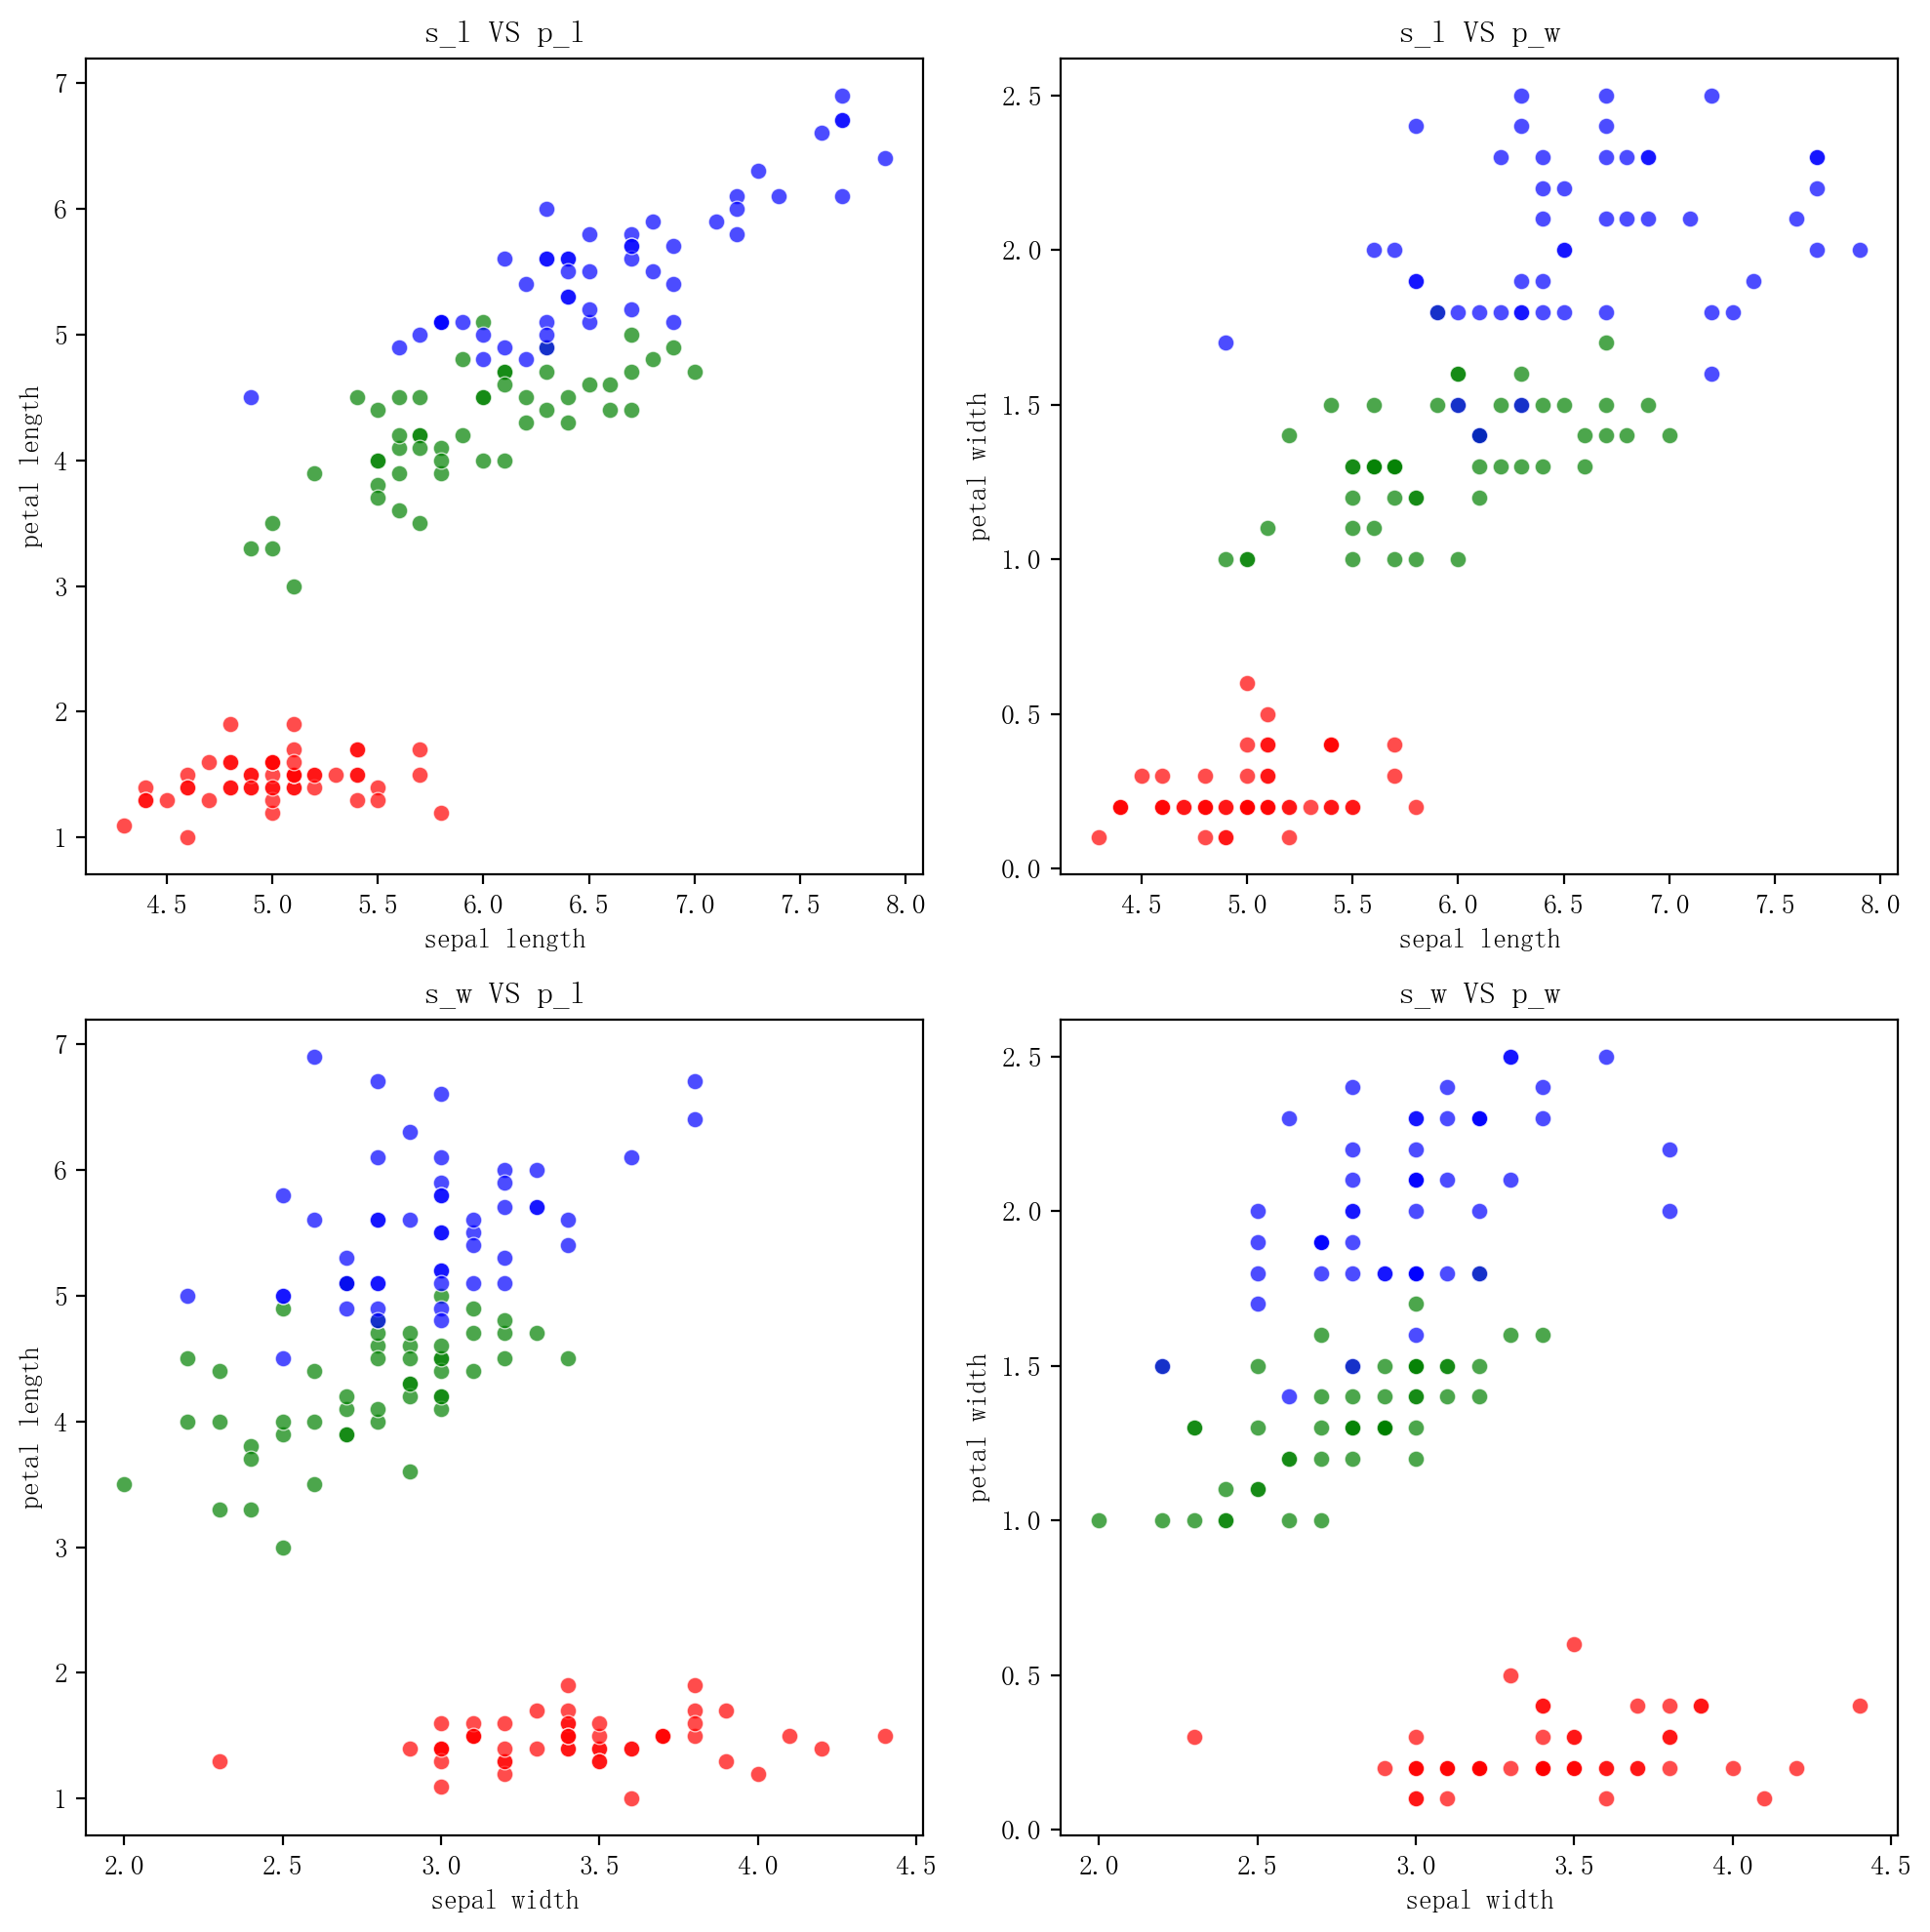

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), dpi=200) #设置2×2子图

species_colors = {
    'setosa': 'red',
    'versicolor': 'green',
    'virginica': 'blue'
} #定义不同种类的散点颜色


for species, color in species_colors.items():
    subset = data[data['species'] == species]
    axes = sns.scatterplot(x= 'sepal_length',y= 'petal_length', ax = axs[0,0], alpha=0.7, color = color, data = subset)
axes.set_title('s_l VS p_l')
axes.set_xlabel('sepal length')
axes.set_ylabel('petal length')
# axs[0,0].legend()
# axs[0,0].grid(True)


for species, color in species_colors.items():
    subset = data[data['species'] == species]
    axes = sns.scatterplot(x= 'sepal_length',y= 'petal_width', ax = axs[0,1], alpha=0.7, color = color, data = subset)
axes.set_title('s_l VS p_w')
axes.set_xlabel('sepal length')
axes.set_ylabel('petal width')
# axs[0,1].legend()
# axs[0,0].grid(True)


for species, color in species_colors.items():
    subset = data[data['species'] == species]
    axes = sns.scatterplot(x= 'sepal_width',y= 'petal_length', ax = axs[1,0], alpha=0.7, color = color, data = subset)
axes.set_title('s_w VS p_l')
axes.set_xlabel('sepal width')
axes.set_ylabel('petal length')
# axs[1,0].legend()
# axs[0,0].grid(True)


for species, color in species_colors.items():
    subset = data[data['species'] == species]
    axes = sns.scatterplot(x= 'sepal_width',y= 'petal_width', ax = axs[1,1], alpha=0.7, color = color, data = subset)
axes.set_title('s_w VS p_w')
axes.set_xlabel('sepal width')
axes.set_ylabel('petal width')
# axs[1,1].legend()
# axs[0,0].grid(True)

# 显示图形
plt.tight_layout()
plt.show()

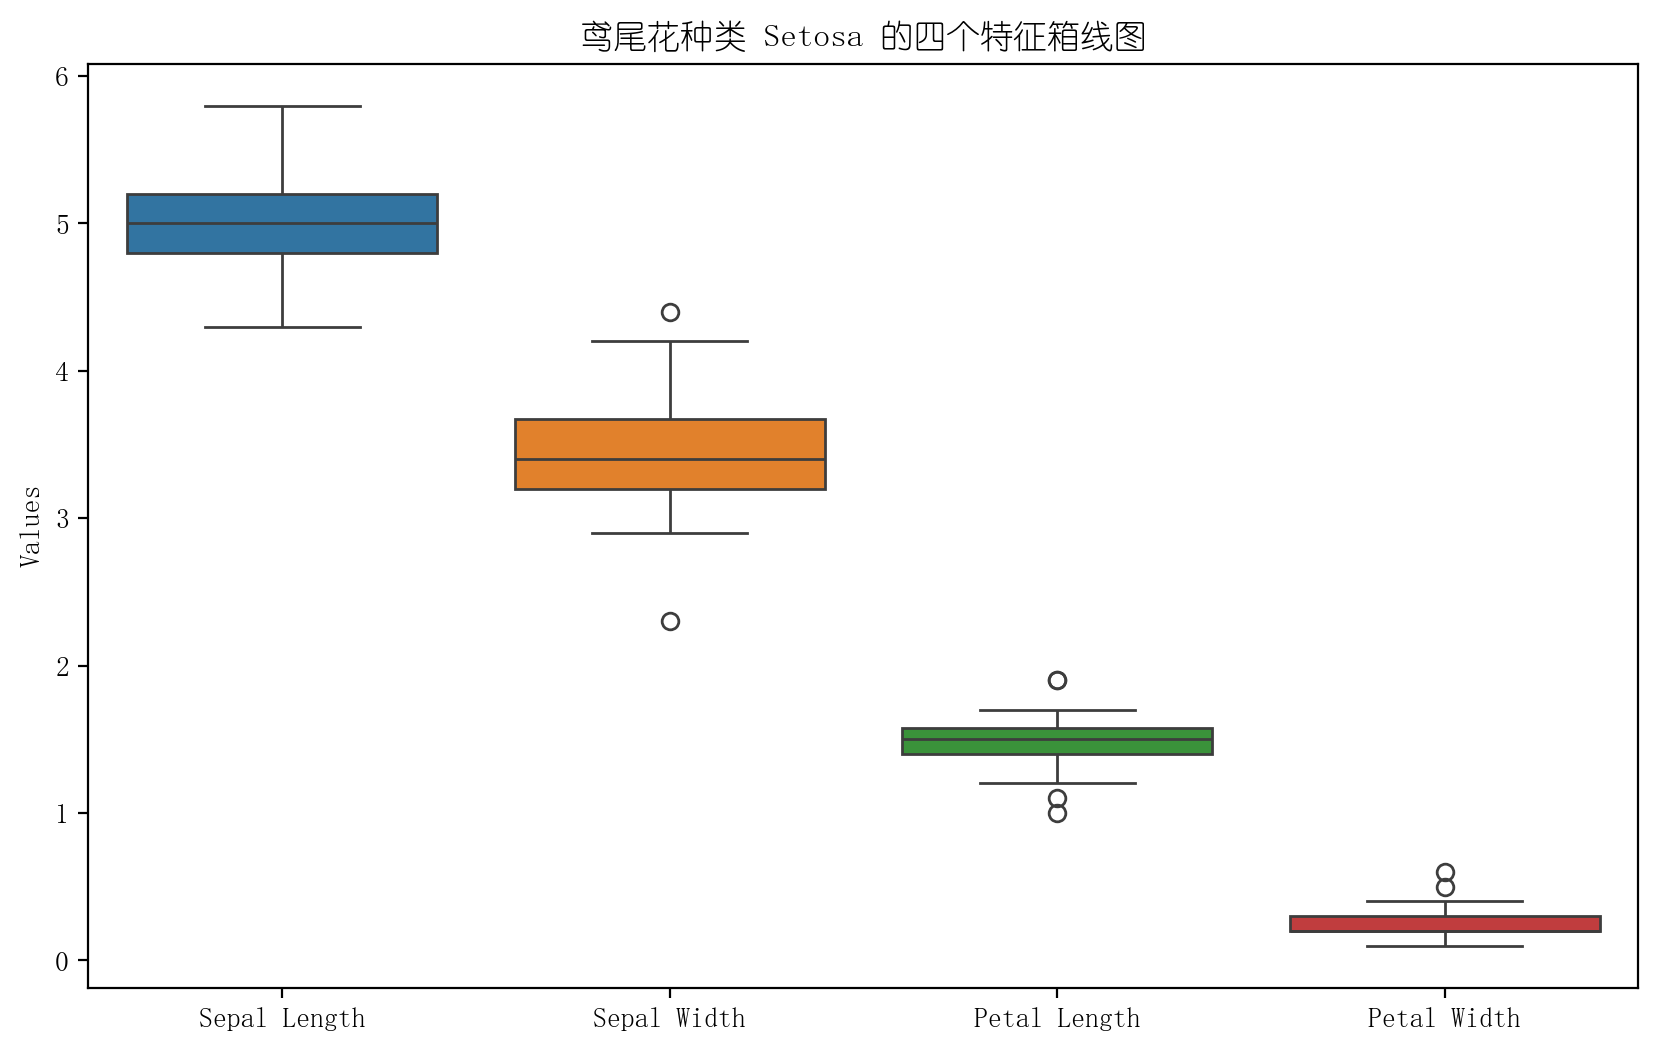

In [20]:
subset = data[data['species'] == 'setosa']

# 创建新的数据框，包含需要绘制的数据
plot_data = pd.DataFrame({
    'Sepal Length': subset['sepal_length'],
    'Sepal Width': subset['sepal_width'],
    'Petal Length': subset['petal_length'],
    'Petal Width': subset['petal_width']
})

# 绘制箱线图
plt.figure(figsize=(10, 6), dpi= 200)
sns.boxplot(data=plot_data)
plt.title('鸢尾花种类 Setosa 的四个特征箱线图')
plt.ylabel('Values')
plt.show()

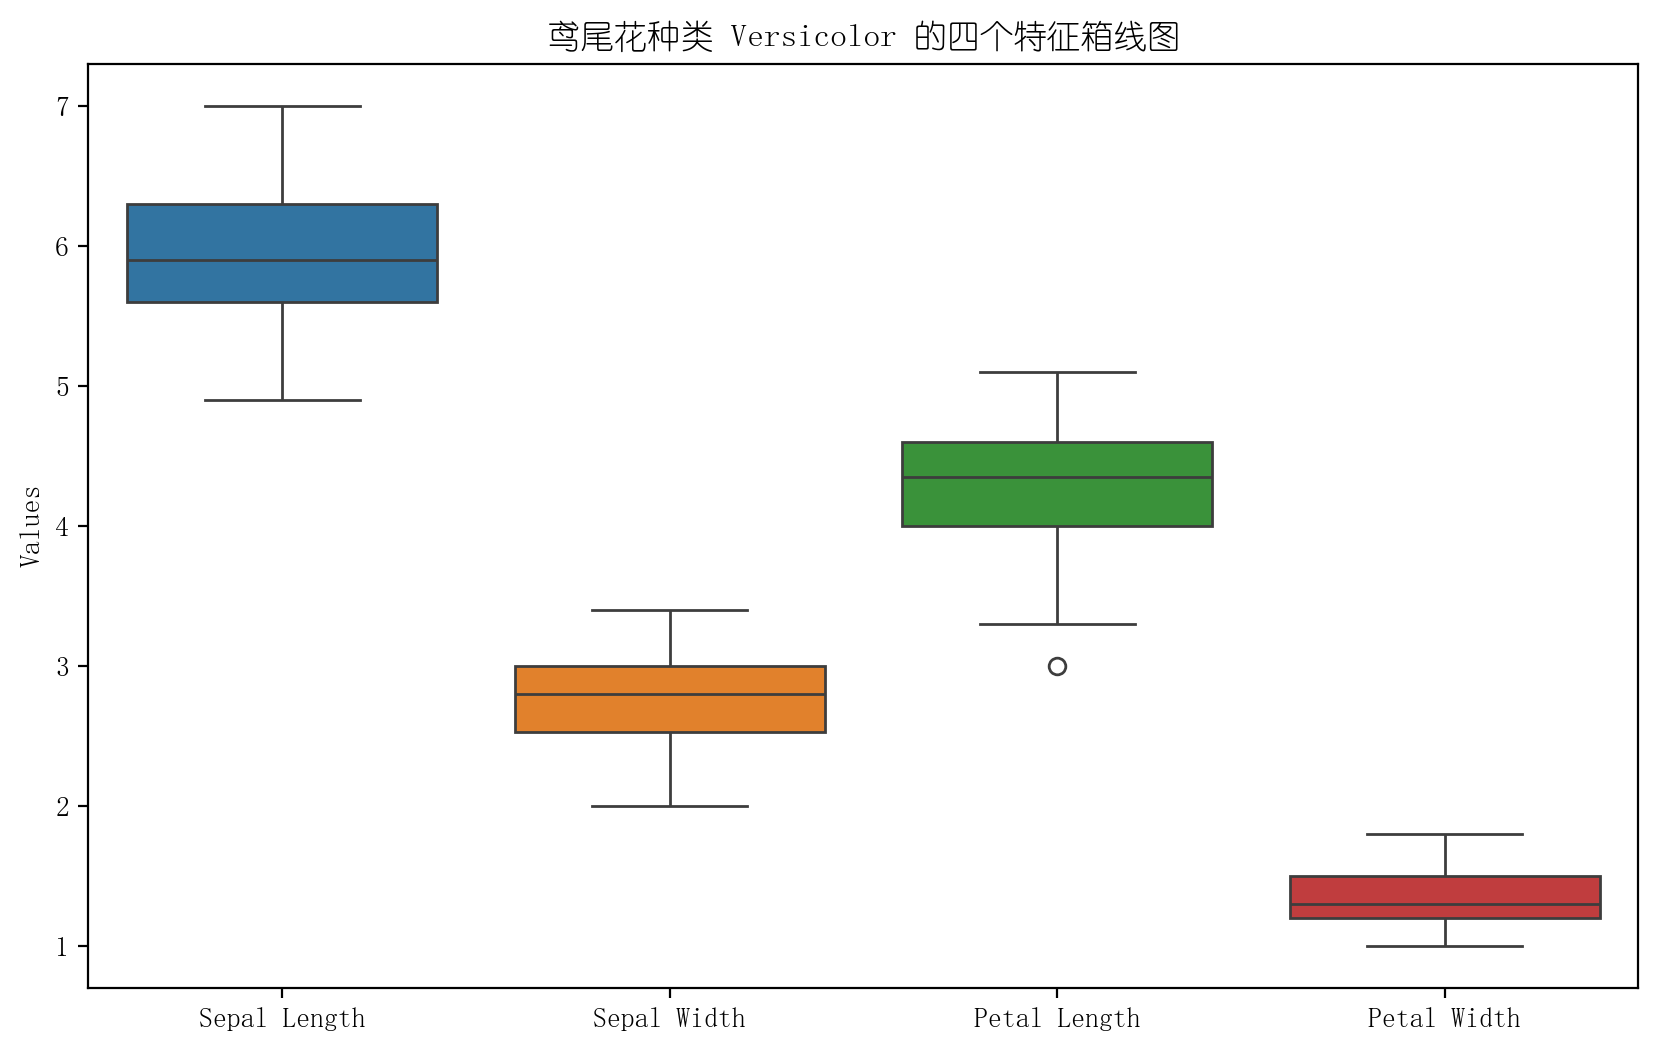

In [21]:
subset = data[data['species'] == 'versicolor']

# 创建新的数据框，包含需要绘制的数据
plot_data = pd.DataFrame({
    'Sepal Length': subset['sepal_length'],
    'Sepal Width': subset['sepal_width'],
    'Petal Length': subset['petal_length'],
    'Petal Width': subset['petal_width']
})

# 绘制箱线图
plt.figure(figsize=(10, 6), dpi= 200)
sns.boxplot(data=plot_data)
plt.title('鸢尾花种类 Versicolor 的四个特征箱线图')
plt.ylabel('Values')
plt.show()

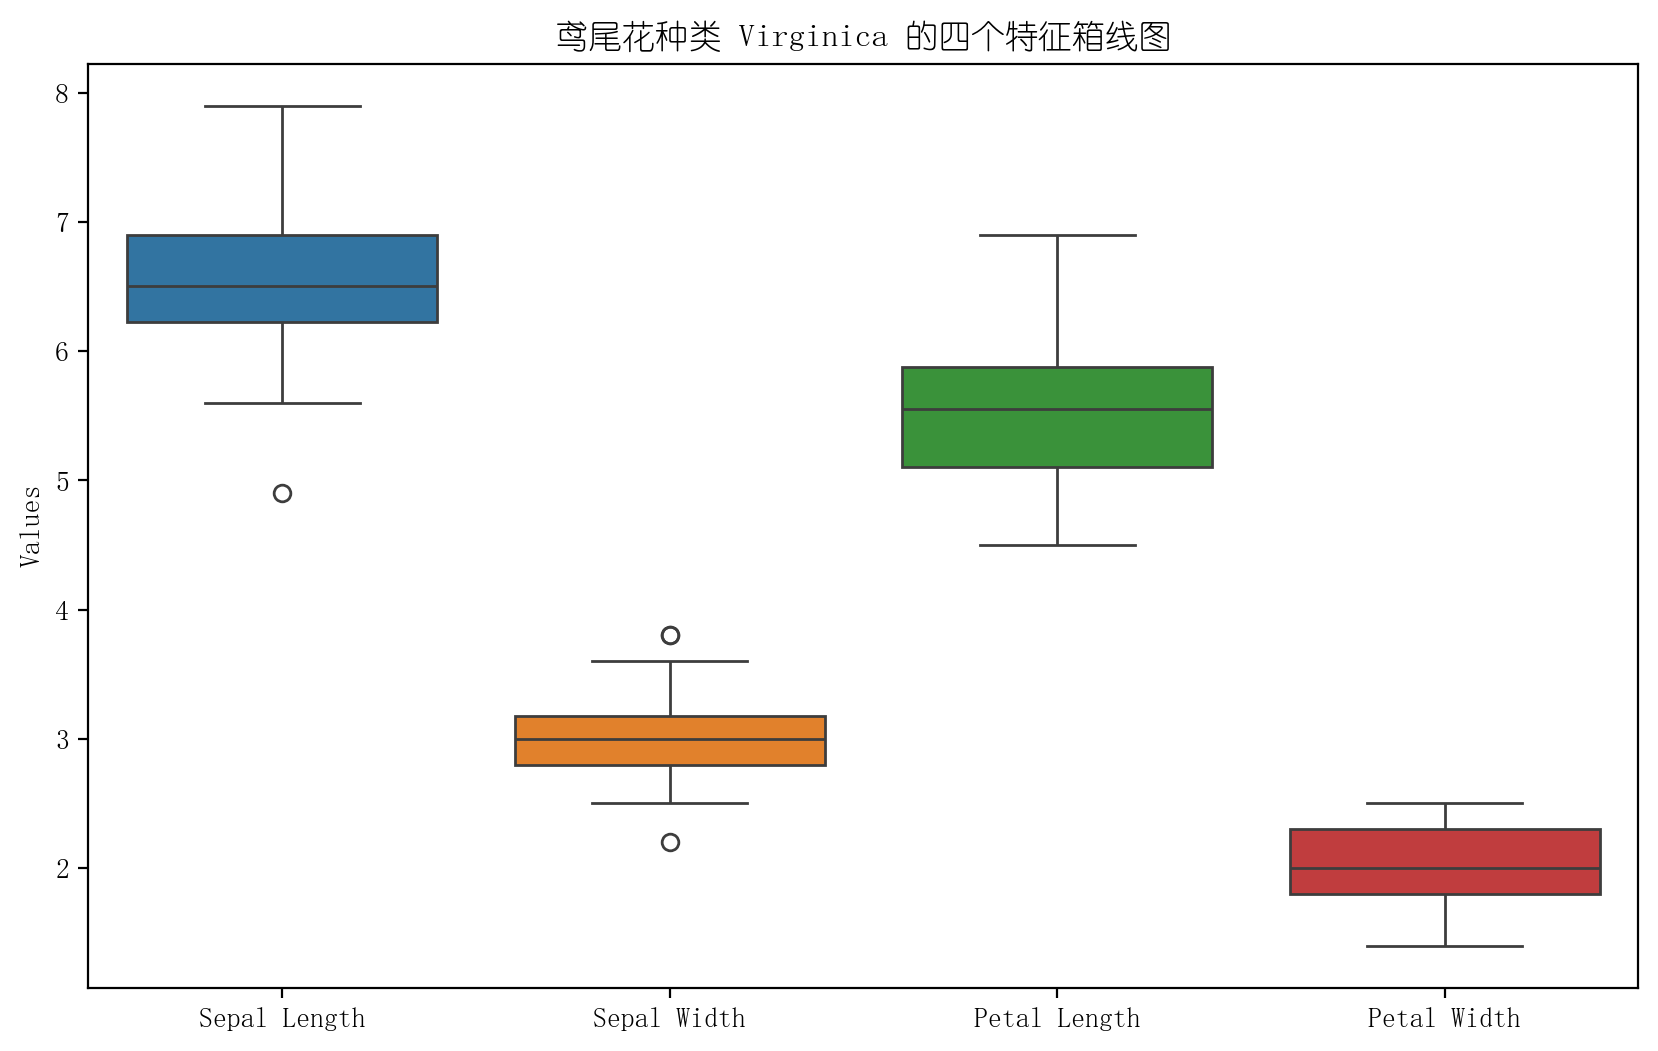

In [22]:
subset = data[data['species'] == 'virginica']

# 创建新的数据框，包含需要绘制的数据
plot_data = pd.DataFrame({
    'Sepal Length': subset['sepal_length'],
    'Sepal Width': subset['sepal_width'],
    'Petal Length': subset['petal_length'],
    'Petal Width': subset['petal_width']
})

# 绘制箱线图
plt.figure(figsize=(10, 6), dpi= 200)
sns.boxplot(data=plot_data)
plt.title('鸢尾花种类 Virginica 的四个特征箱线图')
plt.ylabel('Values')
plt.show()

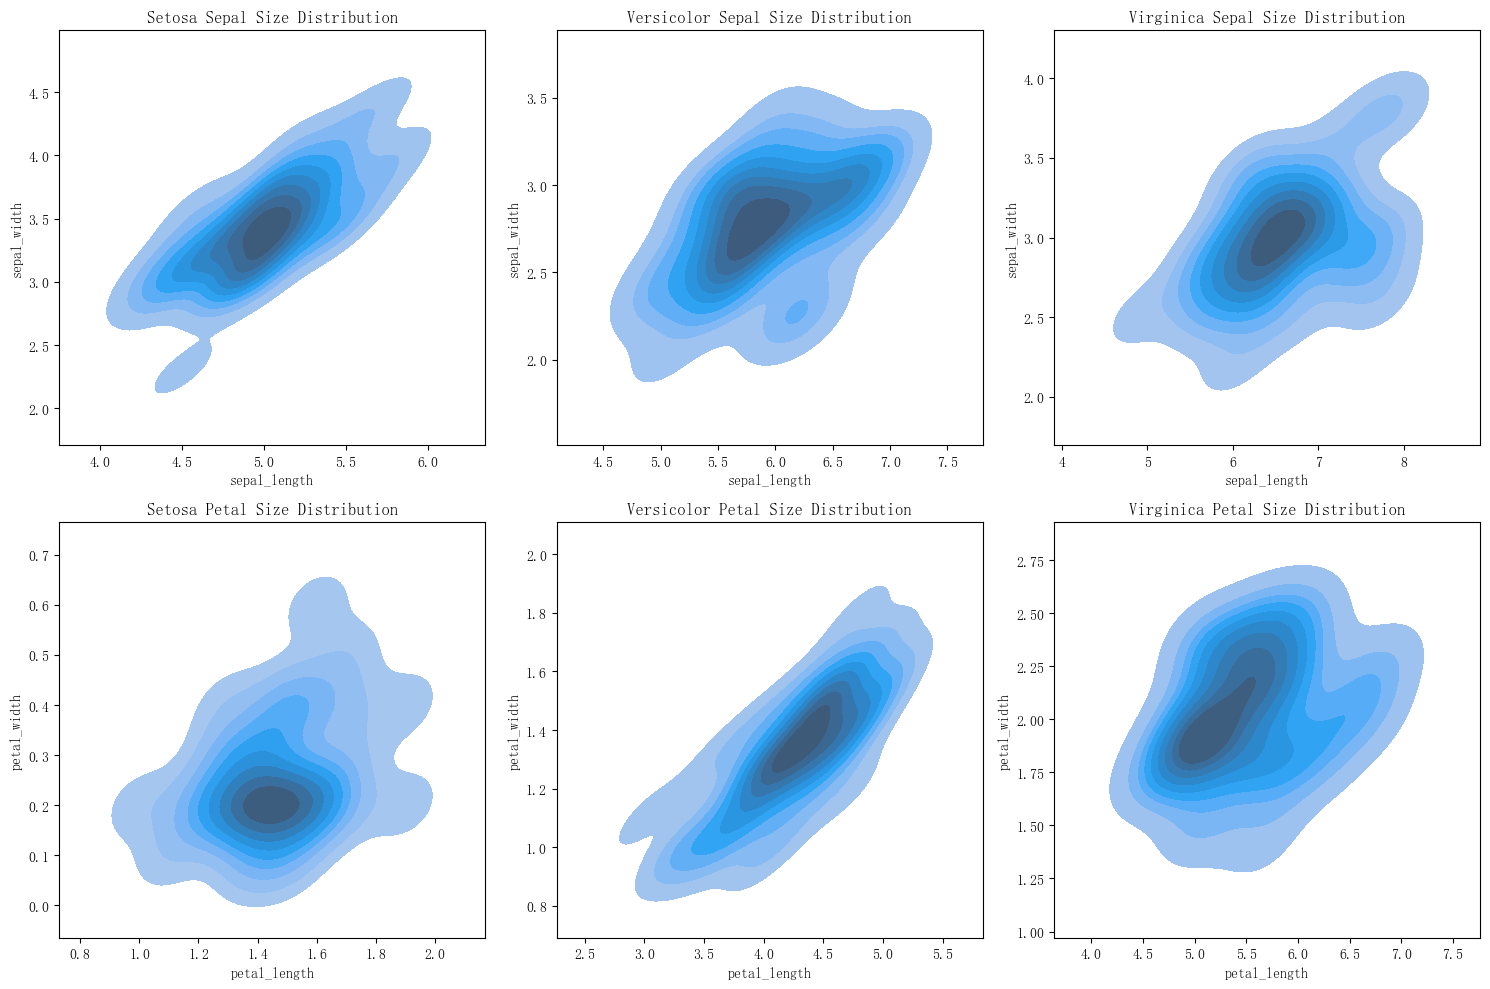

In [14]:
# 分别为三个种类绘制核密度估计图
species = data['species'].unique()

plt.figure(figsize=(15, 10))

for i, specie in enumerate(species, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(
        data=data[data['species'] == specie],
        x="sepal_length",
        y="sepal_width",
        fill=True
    )
    plt.title(f"{specie.capitalize()} Sepal Size Distribution")

    plt.subplot(2, 3, i + 3)
    sns.kdeplot(
        data=data[data['species'] == specie],
        x="petal_length",
        y="petal_width",
        fill=True
    )
    plt.title(f"{specie.capitalize()} Petal Size Distribution")

plt.tight_layout()
plt.show()


## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [6]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


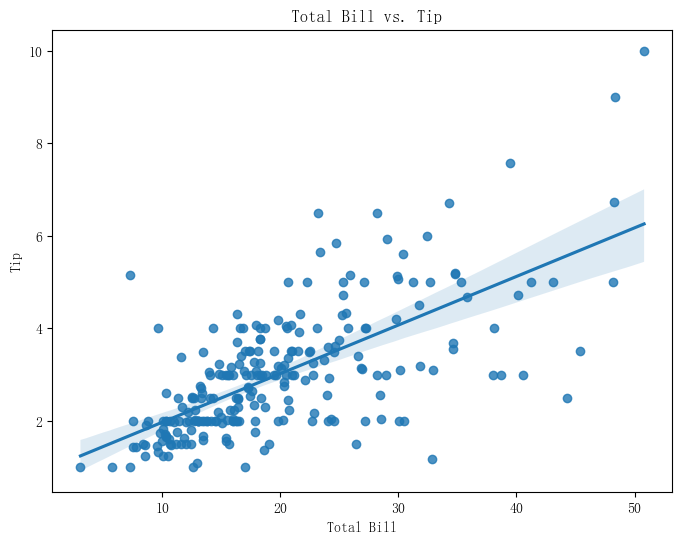

In [17]:
# 使用seaborn绘制散点图并回归分析
plt.figure(figsize=(8, 6))
sns.regplot(x="total_bill", y="tip", data= data)
plt.title(" Total Bill vs. Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

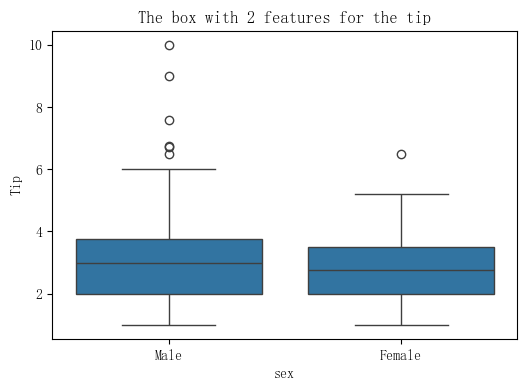

In [28]:
plt.figure(figsize=(6, 4))
sns.boxplot( x ="sex", y="tip", data=data)
plt.title("The box with 2 features for the tip")
plt.xlabel("sex")
plt.ylabel("Tip")
plt.show()

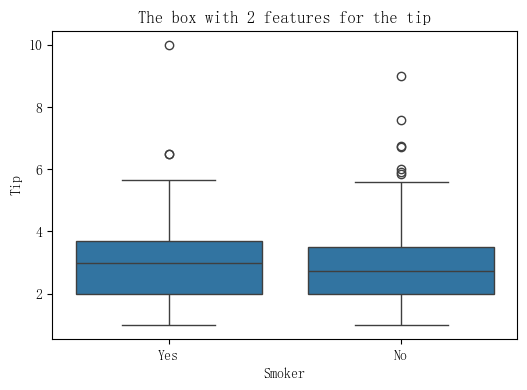

In [7]:
plt.figure(figsize=(6, 4))
sns.boxplot( x ="smoker", y="tip", data=data)
plt.title("The box with 2 features for the tip")
plt.xlabel("Smoker")
plt.ylabel("Tip")
plt.show()

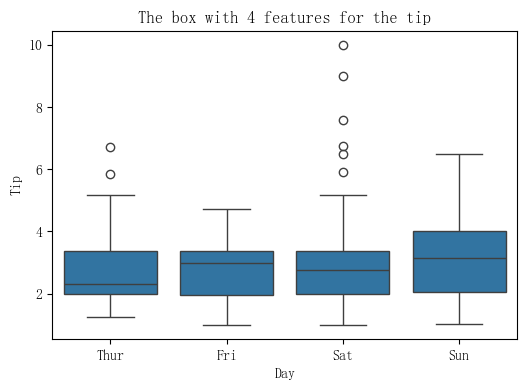

In [10]:
plt.figure(figsize=(6, 4))
sns.boxplot( x ="day", y="tip", data=data)
plt.title("The box with 4 features for the tip")
plt.xlabel("Day")
plt.ylabel("Tip")
plt.show()

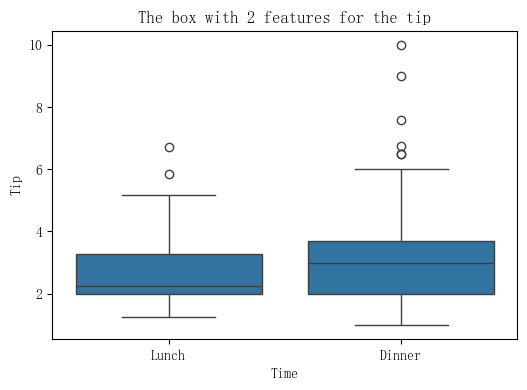

In [9]:
plt.figure(figsize=(6, 4))
sns.boxplot( x ="time", y="tip", data=data)
plt.title("The box with 2 features for the tip")
plt.xlabel("Time")
plt.ylabel("Tip")
plt.show()

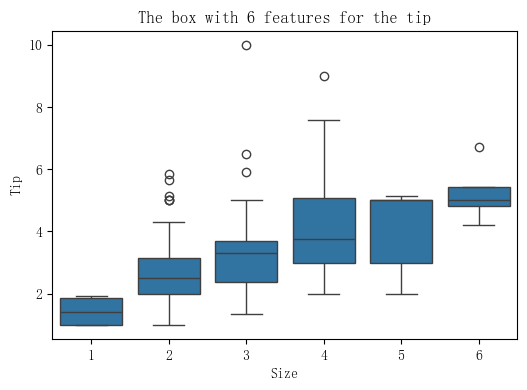

In [11]:
plt.figure(figsize=(6, 4))
sns.boxplot( x ="size", y="tip", data=data)
plt.title("The box with 6 features for the tip")
plt.xlabel("Size")
plt.ylabel("Tip")
plt.show()

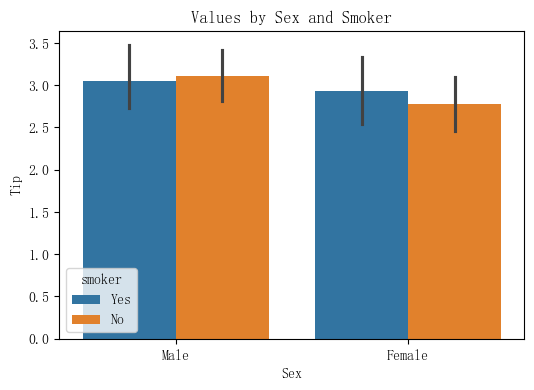

In [19]:
plt.figure(figsize=(6, 4))
sns.barplot( x ="sex", y="tip",hue = 'smoker', data=data)
plt.title("Values by Sex and Smoker")
plt.xlabel("Sex")
plt.ylabel("Tip")
plt.show()

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [20]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


C:\Users\Logic\AppData\Local\Temp\ipykernel_68652\3018210510.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_proportions = data.groupby('class')['survived'].value_counts(normalize=True).rename('proportion').reset_index()


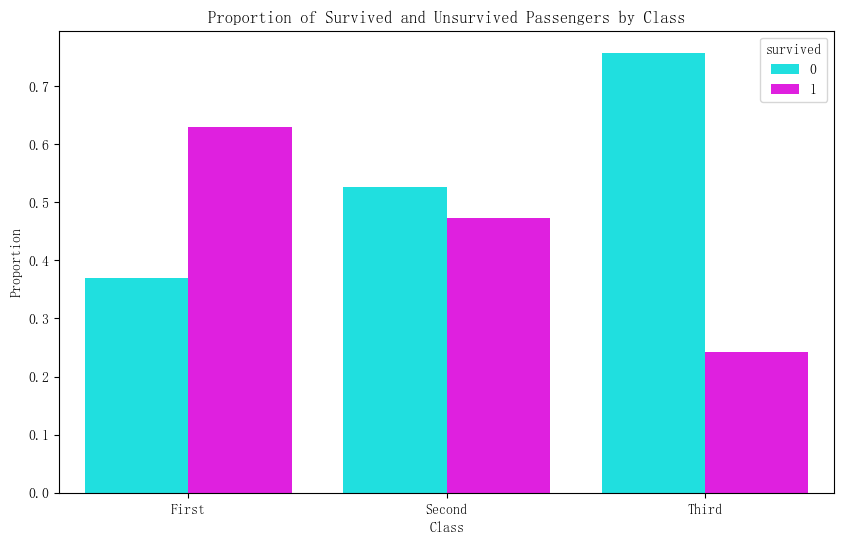

In [32]:
survival_proportions = data.groupby('class')['survived'].value_counts(normalize=True).rename('proportion').reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='proportion', hue='survived', data=survival_proportions, palette=['cyan', 'magenta'])

plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Proportion of Survived and Unsurvived Passengers by Class')
# plt.legend(title='Survived', labels=['Unsurvived', 'Survived'])
plt.show()

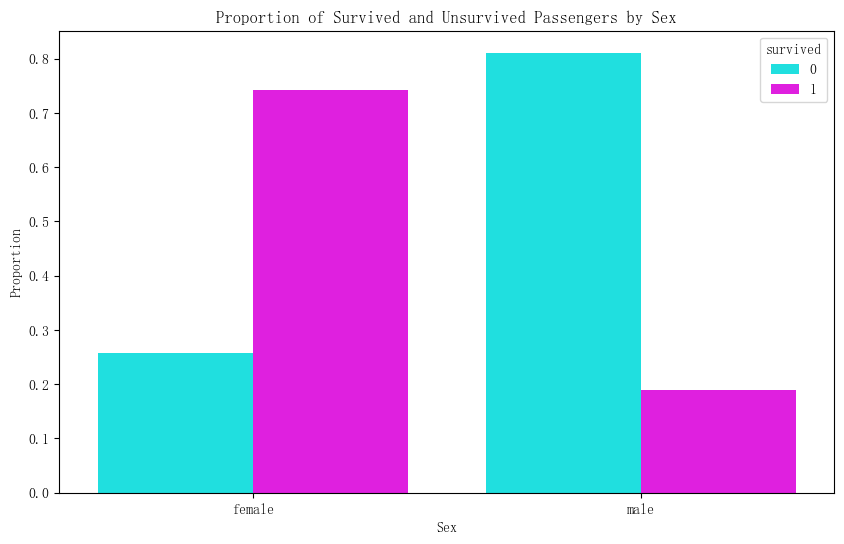

In [33]:
survival_proportions = data.groupby('sex')['survived'].value_counts(normalize=True).rename('proportion').reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='proportion', hue='survived', data=survival_proportions, palette=['cyan', 'magenta'])

plt.xlabel('Sex')
plt.ylabel('Proportion')
plt.title('Proportion of Survived and Unsurvived Passengers by Sex')
# plt.legend(title='Survived', labels=['Unsurvived', 'Survived'])
plt.show()

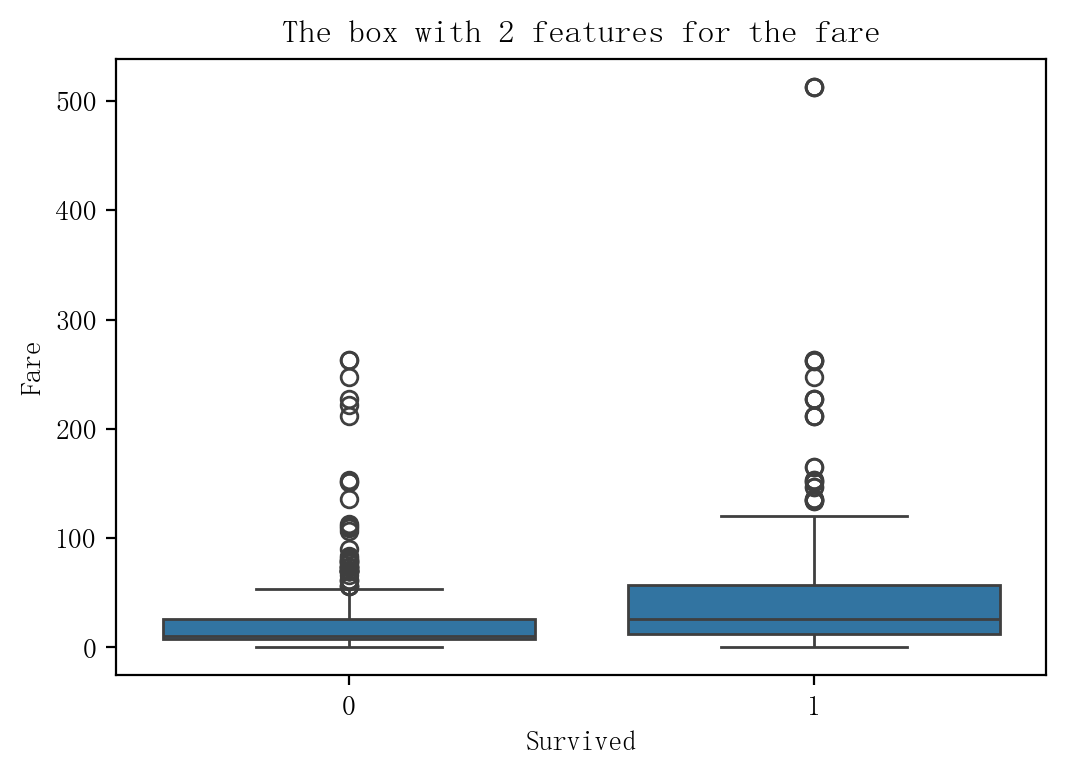

In [27]:
plt.figure(figsize=(6, 4),dpi = 200)
sns.boxplot( x ="survived", y="fare", data=data)
plt.title("The box with 2 features for the fare")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.show()

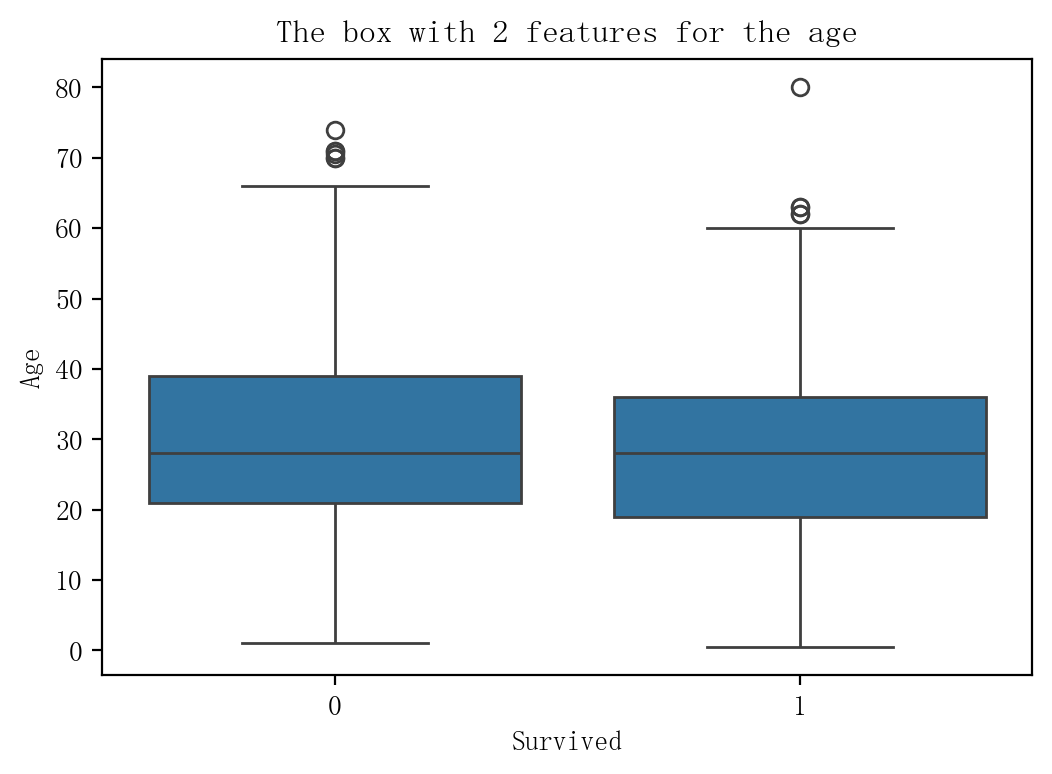

In [28]:
plt.figure(figsize=(6, 4),dpi = 200)
sns.boxplot( x ="survived", y="age", data=data)
plt.title("The box with 2 features for the age")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

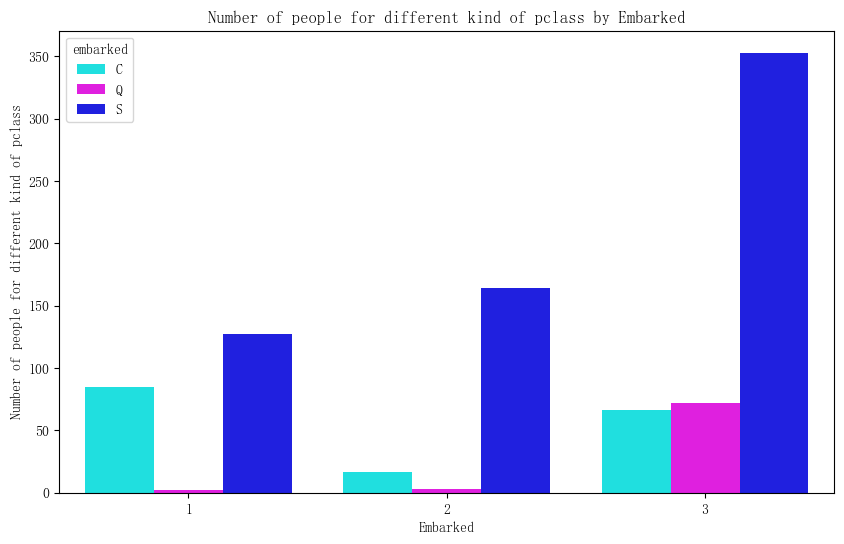

In [34]:
pclass_embarked = data.groupby(['pclass','embarked']).size().rename('number').reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='number', hue='embarked', data= pclass_embarked, palette=['cyan', 'magenta','blue'])

plt.xlabel('Embarked')
plt.ylabel('Number of people for different kind of pclass')
plt.title('Number of people for different kind of pclass by Embarked')
# plt.legend(title='embarked', labels=['C', 'Q', 'S'])
plt.show()

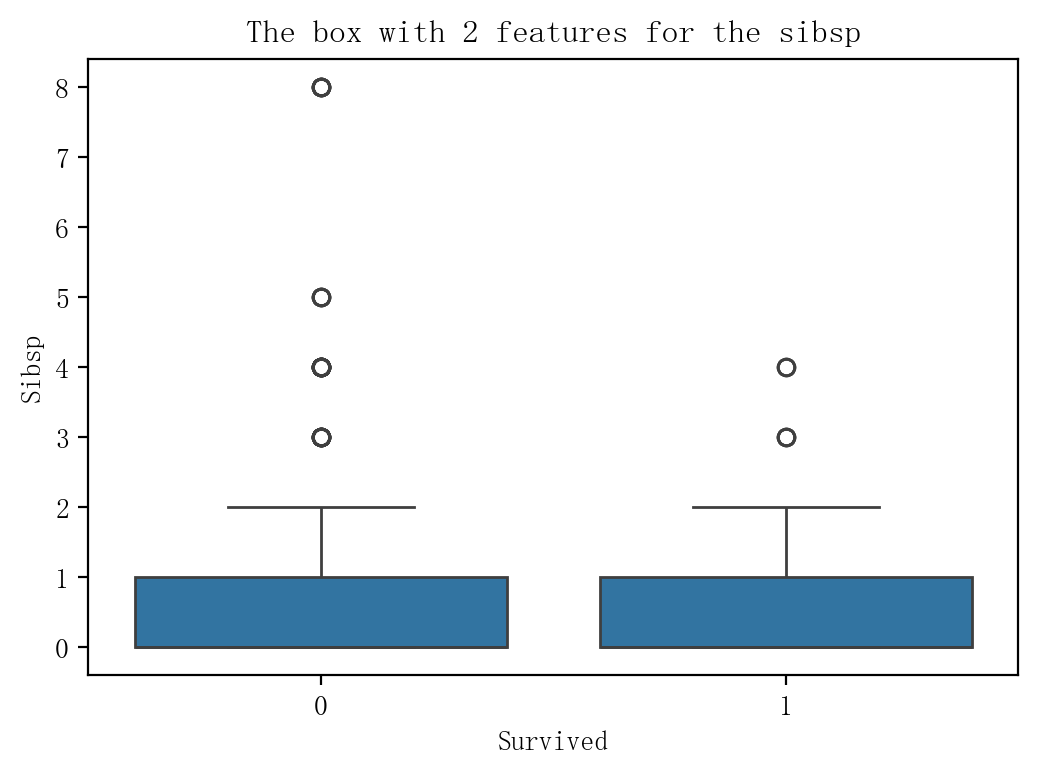

In [35]:
plt.figure(figsize=(6, 4),dpi = 200)
sns.boxplot( x ="survived", y="sibsp", data=data)
plt.title("The box with 2 features for the sibsp")
plt.xlabel("Survived")
plt.ylabel("Sibsp")
plt.show()

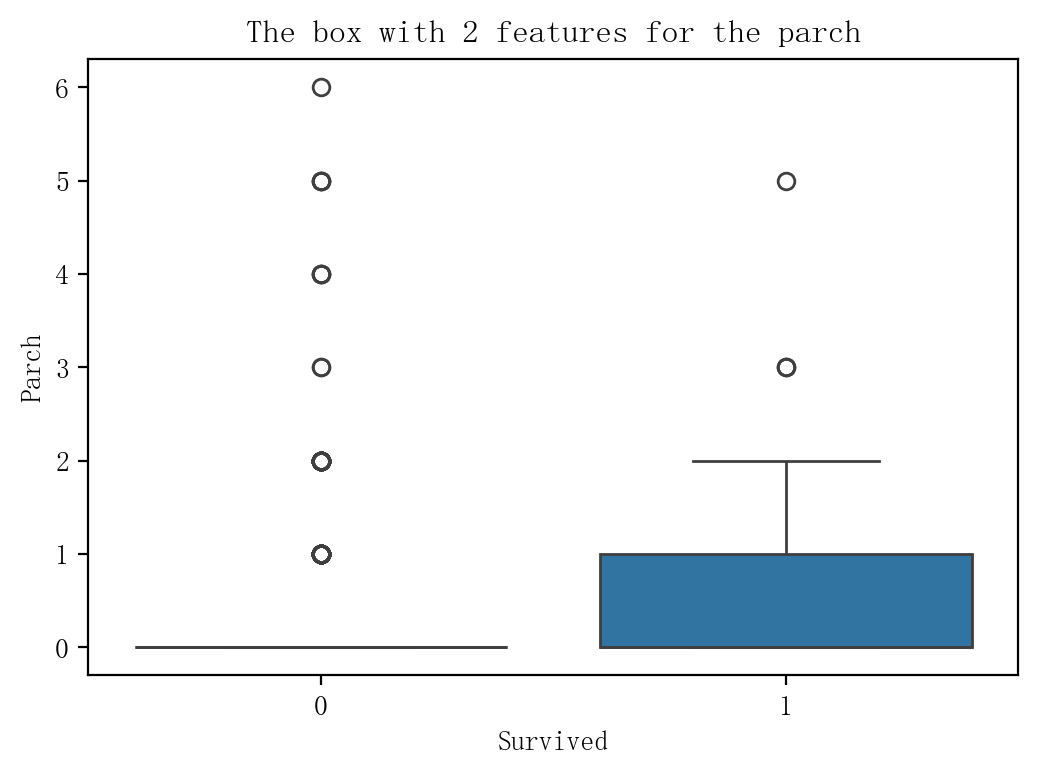

In [36]:
plt.figure(figsize=(6, 4),dpi = 200)
sns.boxplot( x ="survived", y="parch", data=data)
plt.title("The box with 2 features for the parch")
plt.xlabel("Survived")
plt.ylabel("Parch")
plt.show()

C:\Users\Logic\AppData\Local\Temp\ipykernel_68652\811728639.py:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(x='alone', y='number', hue='survived', data= survival_alone, palette=['cyan', 'magenta','blue'])


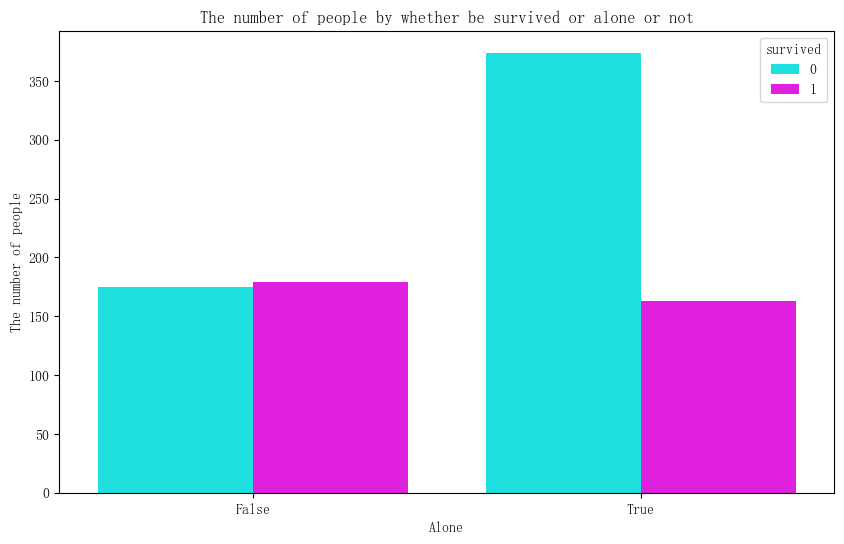

In [37]:
survival_alone = data.groupby(['survived','alone']).size().rename('number').reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='alone', y='number', hue='survived', data= survival_alone, palette=['cyan', 'magenta','blue'])

plt.xlabel('Alone')
plt.ylabel('The number of people')
plt.title('The number of people by whether be survived or alone or not')
# plt.legend(title='embarked', labels=['C', 'Q', 'S'])
plt.show()